# 2.3 - Support Vector Machine Algorithm Implementation on the UNSW-NB15 Dataset

Implementation of Support Vector Machine Classifier algorithm on the University of New South Wales NB15 Dataset.

## Importing libraries and fitting the data

In [1]:
import pandas as pd
import pickle as pk
import numpy as np
import matplotlib as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [2]:
with open('../1.Data_Processing/dataset-nids.pkl', 'rb') as f:
    X_train, y_train, X_test, y_test = pk.load(f)

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3549974, 7), (3549974,), (508003, 7), (508003,))

In [4]:
%%time 

param_grid = {
    "C": [1,5],
    "gamma": [0.1, 1],
    "max_iter": [1000, 5000]

}

Wall time: 0 ns


In [5]:
cf_svm = GridSearchCV(SVC(),param_grid=param_grid, scoring="precision", cv=3, verbose=2)
cf_svm.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ......................C=1, gamma=0.1, max_iter=1000; total time= 4.8min
[CV] END ......................C=1, gamma=0.1, max_iter=1000; total time= 5.2min
[CV] END ......................C=1, gamma=0.1, max_iter=1000; total time= 5.2min
[CV] END ......................C=1, gamma=0.1, max_iter=5000; total time=24.7min
[CV] END ......................C=1, gamma=0.1, max_iter=5000; total time=26.2min
[CV] END ......................C=1, gamma=0.1, max_iter=5000; total time=26.9min
[CV] END ........................C=1, gamma=1, max_iter=1000; total time= 4.8min
[CV] END ........................C=1, gamma=1, max_iter=1000; total time= 5.2min
[CV] END ........................C=1, gamma=1, max_iter=1000; total time= 5.2min
[CV] END ........................C=1, gamma=1, max_iter=5000; total time=24.4min
[CV] END ........................C=1, gamma=1, max_iter=5000; total time=26.9min
[CV] END ........................C=1, gamma=1, ma

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [1, 5], 'gamma': [0.1, 1],
                         'max_iter': [1000, 5000]},
             scoring='precision', verbose=2)

In [6]:
params = cf_svm.best_params_
score = cf_svm.best_score_

print(params)
print(score)

{'C': 5, 'gamma': 1, 'max_iter': 1000}
0.9930479687965722


In [8]:
svm = SVC(C = 5, gamma = 1, kernel = "rbf",verbose=3, max_iter=10000,probability=True)
svm_cls = svm.fit(X_train, y_train)

[LibSVM]

## Plotting the Confusion Matrix

In [9]:
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, auc, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

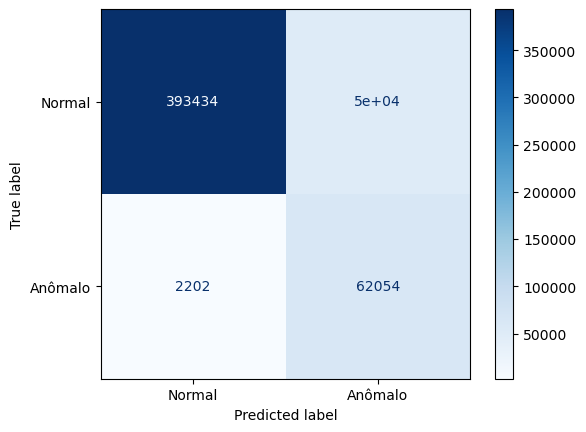

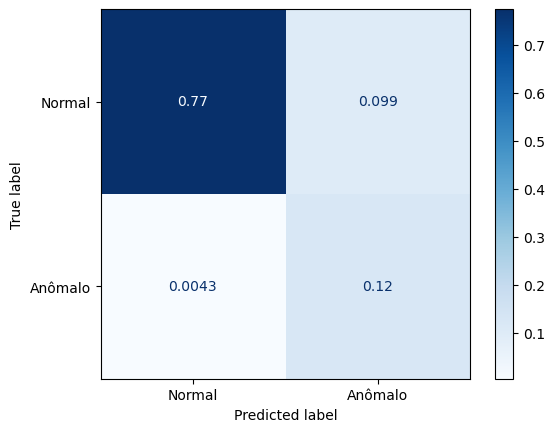

In [10]:
ConfusionMatrixDisplay.from_estimator(svm_cls, X_test, y_test, cmap = 'Blues', display_labels=['Normal', 'Anômalo'])
ConfusionMatrixDisplay.from_estimator(svm_cls, X_test, y_test, normalize = 'all', cmap = 'Blues', display_labels=['Normal', 'Anômalo'])
plt.show()

## Plotting the ROC curve

In [11]:
y_pred_prob = svm_cls.predict_proba(X_test)[::,1]

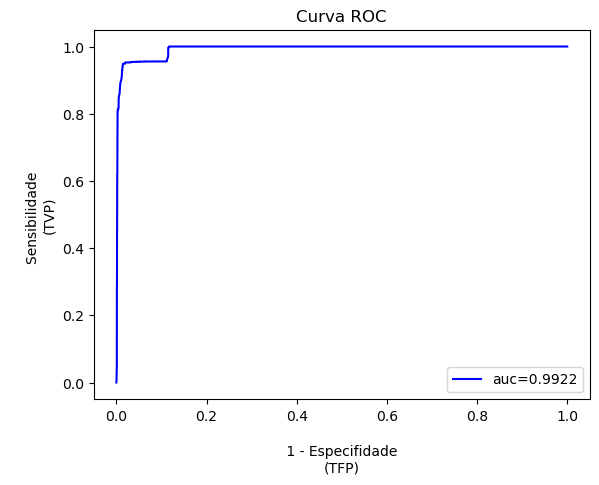

In [12]:
fpr, tpr, _ = roc_curve(y_test,  y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr,tpr,color='blue',label="auc="+str(round(auc,4)))
plt.ylabel('\nSensibilidade \n(TVP)')
plt.xlabel('\n 1 - Especifidade \n(TFP)')
plt.title('Curva ROC')
plt.legend(loc=4)
plt.show()

## Executing the Cross Validation

In [13]:
X_train = np.concatenate((X_train,X_test), axis = 0)
y_train = np.concatenate((y_train,y_test), axis = 0)

In [14]:
X_train.shape, y_train.shape

((4057977, 7), (4057977,))

In [15]:
from sklearn.model_selection import KFold, cross_validate

In [16]:
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc' ]
svc = SVC(C = 10, gamma = 1, kernel = "rbf",verbose=3, max_iter = 1000, probability=True)
svc.fit(X_train, y_train)
metrics = cross_validate(svc, X_train, y_train, cv=10, scoring= metrics)

for met in metrics:
    print(f"- {met}:")
    print(f"-- {metrics[met]}\n")
    print(f"-- {np.mean(metrics[met])} +- {np.std(metrics[met])}\n")  

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]- fit_time:
-- [4949.69054103 4967.1392715  5005.35938883 4953.17893982 4957.55477715
 4954.38784575 5069.87947035 4961.95807886 4986.94303489 5108.84941506]

-- 4991.494076323509 +- 52.28706310807981

- score_time:
-- [100.01173282 100.10502648  99.15892148  99.45665503  99.32291079
  99.20640564  99.83373475  99.63928962  99.77253246 103.25746179]

-- 99.97646708488465 +- 1.1365326116552323

- test_accuracy:
-- [0.91290741 0.91372308 0.91304294 0.9130528  0.91275955 0.91299119
 0.9129493  0.91370809 0.91290473 0.91300084]

-- 0.9131039925316659 +- 0.0003160439632131326

- test_precision:
-- [0.99083623 0.99108285 0.99074881 0.9908592  0.99042411 0.99066322
 0.99072698 0.99111483 0.99067402 0.99075419]

-- 0.990788445227499 +- 0.00019197159550468675

- test_recall:
-- [0.81538671 0.81699606 0.81576186 0.81569018 0.81540201 0.81571736
 0.81557056 0.81693526 0.81551619 0.81566299]

-- 0.8158639176265